In [1]:
# >%matplotlib notebook

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matminer.featurizers.structure import XRDPowderPattern
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 8]

In [3]:
df = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\pkl_files\neutron_hfo2.pkl')

In [39]:
X = df
X

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.061504,0.062472,0.062597,0.061873,0.060328,0.058024,0.055049,0.051518,0.047557,0.043304
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007269,0.006771,0.006270,0.005765,0.005261,0.004760,0.004270,0.003794,0.003339,0.002911
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040469,0.039121,0.037479,0.035565,0.033415,0.031072,0.028586,0.026013,0.023407,0.020824
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003565,0.003347,0.003146,0.002959,0.002783,0.002612,0.002444,0.002276,0.002107,0.001937
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068553,0.062959,0.057238,0.051497,0.045839,0.040357,0.035134,0.030238,0.025721,0.021619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002060,0.001998,0.001920,0.001825,0.001716,0.001595,0.001464,0.001327,0.001187,0.001048
1721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034875,0.031871,0.029119,0.026596,0.024271,0.022114,0.020099,0.018201,0.016406,0.014702
1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031703,0.030772,0.029596,0.028202,0.026623,0.024899,0.023069,0.021175,0.019256,0.017349
1723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016798,0.017826,0.018708,0.019406,0.019886,0.020124,0.020108,0.019834,0.019309,0.018553


In [5]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true

0             m
1             o
2           p-o
3             t
4             m
         ...   
1720          t
1721          m
1722          o
1723    unknown
1724          t
Name: labels_0_4, Length: 1725, dtype: object

In [6]:
# labels_true = labels_true['new_labels']
# labels_true = labels_true.values
# labels_true = labels_true.astype(int)

In [7]:
# labels_true = labels_true.replace({'m': 0, 'p-o': 1, 'o': 2, 't': 3, 'unknown': 4})
# labels_true

In [56]:
# not good
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

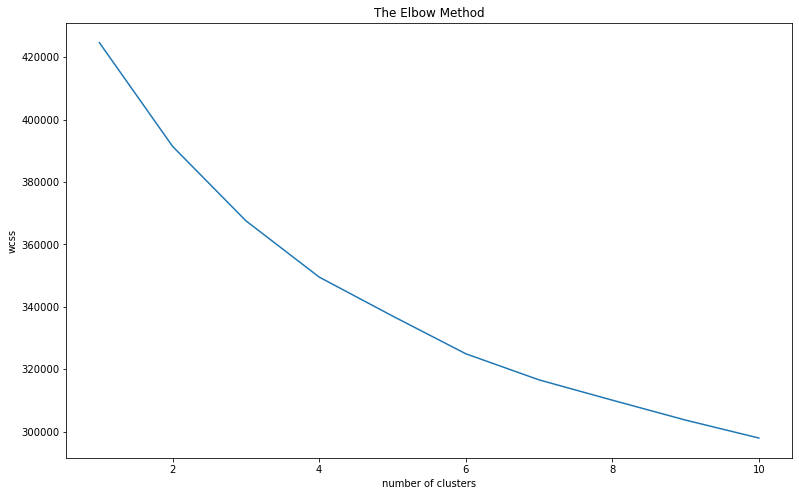

In [10]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

C:\Users\Maxi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


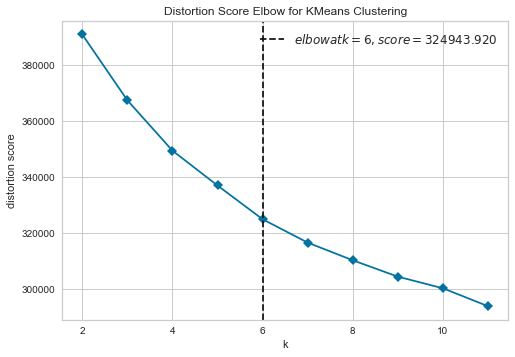

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2,12), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [12]:
mPCA = PCA(n_components=100)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

array([11.1, 18.1, 23.5, 27.4, 30.6, 33.3, 35.4, 37.2, 38.6, 39.9, 41.1,
       42.3, 43.4, 44.4, 45.4, 46.3, 47.2, 48. , 48.8, 49.6, 50.3, 51. ,
       51.7, 52.3, 52.9, 53.5, 54.1, 54.7, 55.2, 55.7, 56.2, 56.7, 57.2,
       57.7, 58.2, 58.6, 59. , 59.4, 59.8, 60.2, 60.6, 61. , 61.4, 61.8,
       62.2, 62.5, 62.8, 63.1, 63.4, 63.7, 64. , 64.3, 64.6, 64.9, 65.2,
       65.5, 65.8, 66.1, 66.4, 66.7, 67. , 67.3, 67.6, 67.9, 68.2, 68.5,
       68.8, 69. , 69.2, 69.4, 69.6, 69.8, 70. , 70.2, 70.4, 70.6, 70.8,
       71. , 71.2, 71.4, 71.6, 71.8, 72. , 72.2, 72.4, 72.6, 72.8, 73. ,
       73.2, 73.4, 73.6, 73.8, 74. , 74.2, 74.4, 74.6, 74.8, 75. , 75.2,
       75.4])

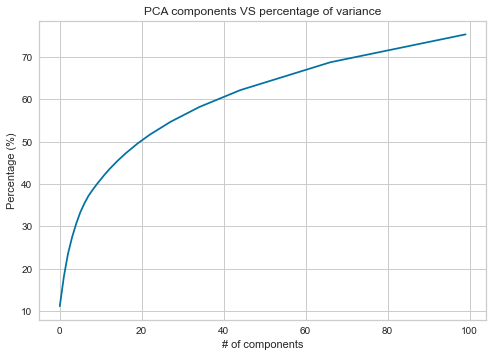

In [13]:
plt.title("PCA components VS percentage of variance")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [14]:
pca = PCA(n_components=4)
PCA = pca.fit_transform(X)

In [15]:
kmeans = KMeans(n_clusters=5)
PCA_labels = kmeans.fit_predict(PCA)

In [16]:
from sklearn import metrics
metrics.silhouette_score(PCA, PCA_labels, metric='l2')

0.3889827714985397

In [17]:
dfPCA = pd.DataFrame(PCA)
dfPCA['cluster'] = PCA_labels
dfPCA['labels'] = labels_true
# dfPCA.columns = ['x1','x2','x3','x4','x5','cluster', 'labels']
dfPCA

,0,1,2,3,cluster,labels
0,4.231319,-8.313051,2.910821,2.841940,2,m
1,2.262213,1.865625,-6.404634,-3.427670,1,o
2,-2.600898,6.754790,9.739250,-4.334256,0,p-o
3,-8.840221,-3.372927,-0.555322,1.060313,4,t
4,4.935101,-5.914658,2.397642,2.892651,2,m
...,...,...,...,...,...,...
1720,-8.681733,-2.620695,-1.817464,0.083760,4,t
1721,2.771977,-2.155102,-0.483887,-3.438242,2,m
1722,0.308705,1.256792,-3.947175,-0.432283,1,o
1723,1.505241,4.230340,-0.095345,2.431400,3,unknown


In [18]:
dfPCA.head(50)

,0,1,2,3,cluster,labels
0,4.231319,-8.313051,2.910821,2.841940,2,m
1,2.262213,1.865625,-6.404634,-3.427670,1,o
2,-2.600898,6.754790,9.739250,-4.334256,0,p-o
3,-8.840221,-3.372927,-0.555322,1.060313,4,t
4,4.935101,-5.914658,2.397642,2.892651,2,m
5,-1.091703,6.632567,7.386145,-2.260649,0,p-o
6,-4.205641,-1.298498,-2.072292,1.751922,4,unknown
7,6.188651,-6.833591,1.779872,-2.139735,2,m
8,4.056662,3.587787,-5.394598,-2.670601,1,o
9,0.405523,7.988594,9.074117,-2.710761,0,p-o


In [ ]:
# look at the above table
dfPCA = dfPCA.replace({'m': 1, 'p-o': 4, 'o': 3, 't': 4, 'unknown': 0})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dfPCA['labels'], dfPCA['cluster'])

Text(0.5, 0.98, '2D PCA Predicted Clusters (73.5% Varianz)')

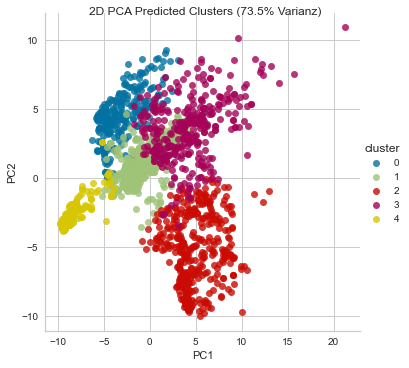

In [19]:
dfPCA2 = dfPCA.iloc[:, [0, 1]].copy()
dfPCA2 = dfPCA2.rename(columns={0: 'PC1', 1: 'PC2'})
dfPCA2['cluster'] = dfPCA[['cluster']]
lm = sns.lmplot(data=dfPCA2, x='PC1', y='PC2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters (18% Varianz)", fontsize=12)

Text(0.5, 0.98, '2D PCA Ground Truth Clusters (73.5% Varianz)')

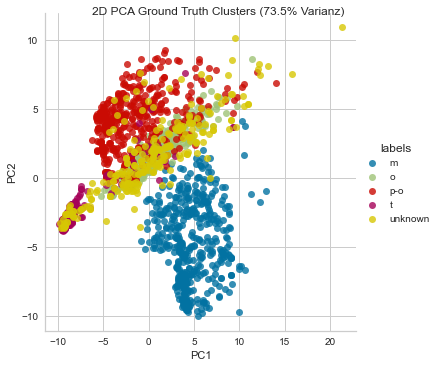

In [20]:
dfPCA2 = dfPCA.iloc[:, [0, 1]].copy()
dfPCA2 = dfPCA2.rename(columns={0: 'PC1', 1: 'PC2'})
dfPCA2['labels'] = dfPCA[['labels']]
lm = sns.lmplot(data=dfPCA2, x='PC1', y='PC2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth Clusters (18% Varianz)", fontsize=12)

In [23]:
import plotly.express as px
dfPCA3 = dfPCA.iloc[:, [0, 1, 2]].copy()
dfPCA3 = dfPCA3.rename(columns={0: 'x1', 1: 'x2', 2:'x3'})
dfPCA3['cluster'] = dfPCA[['cluster']]
fig = px.scatter_3d(
    dfPCA3, x='x1', y='x2', z='x3', color=dfPCA3['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D K-means, Neutronscattering'
)
fig.show()

In [25]:
import plotly.express as px
dfPCA3 = dfPCA.iloc[:, [0, 1, 2]].copy()
dfPCA3 = dfPCA3.rename(columns={0: 'x1', 1: 'x2', 2:'x3'})
dfPCA3['labels'] = dfPCA[['labels']]
fig = px.scatter_3d(
    dfPCA3, x='x1', y='x2', z='x3', color=dfPCA3['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth, Neutronscattering'
)
fig.show()

In [26]:
# NMF Test 
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics

In [27]:
def get_score(model, data, scorer=metrics.explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

In [ ]:
ks = [3,4,6,12, 20]
perfs = []
for k in ks:
    nmf = decomposition.NMF(n_components=k, random_state=0, max_iter = 5000).fit(X)
    perfs.append(get_score(nmf, X))
print(perfs)


In [40]:
from sklearn.decomposition import NMF

model = NMF(n_components=4, init='random', random_state=0, max_iter = 5000)
nmf_features_W = model.fit_transform(X)
nmf_componentes_H = model.components_

In [41]:
nmf_df = pd.DataFrame(nmf_componentes_H.T)
W_df = pd.DataFrame(nmf_features_W)
W_df # weights represent abundence of phase at a given nominal composition

,0,1,2,3
0,0.375941,0.000000,0.000000,0.000000
1,0.021740,0.047910,0.517569,0.000265
2,0.000000,0.579535,0.076800,0.000000
3,0.030344,0.131353,0.000000,0.000000
4,0.337442,0.014879,0.011685,0.019972
...,...,...,...,...
1720,0.000000,0.096482,0.105212,0.000000
1721,0.205931,0.000000,0.137797,0.051131
1722,0.027379,0.000000,0.237413,0.138320
1723,0.008983,0.181762,0.016486,0.334028


In [42]:
kmeans = KMeans(n_clusters=5)
nmf_labels = kmeans.fit_predict(W_df)

In [43]:
from sklearn import metrics
metrics.silhouette_score(W_df, nmf_labels, metric='l2')

0.4397249633832124

In [44]:
W_df['cluster'] = nmf_labels
W_df['labels'] = labels_true
W_df.columns = ['x1','x2','x3','x4','cluster', 'labels']
W_df.head(40)

,x1,x2,x3,x4,cluster,labels
0,0.375941,0.000000,0.000000,0.000000,2,m
1,0.021740,0.047910,0.517569,0.000265,1,o
2,0.000000,0.579535,0.076800,0.000000,0,p-o
3,0.030344,0.131353,0.000000,0.000000,4,t
4,0.337442,0.014879,0.011685,0.019972,2,m
5,0.000000,0.394721,0.105075,0.101723,0,p-o
6,0.034347,0.082722,0.070570,0.058466,4,unknown
7,0.387858,0.000000,0.066200,0.000000,2,m
8,0.036849,0.084600,0.425302,0.071379,1,o
9,0.000189,0.482627,0.112995,0.096894,0,p-o


In [33]:
W_df = W_df.replace({'m': 1, 'p-o': 4, 'o': 0, 't': 3, 'unknown': 2})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(W_df['labels'], W_df['cluster'])

Text(0.5, 0.98, '2D NMF Predicted Clusters (24.1% Varianz)')

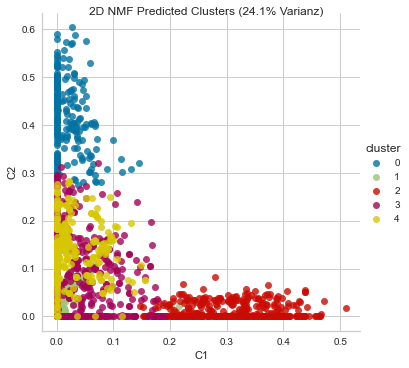

In [45]:
W_df2D  = W_df[['x1', 'x2']]
W_df2D = W_df2D.rename(columns={'x1': 'C1', 'x2': 'C2'})
W_df2D['cluster'] = W_df[['cluster']]
lm = sns.lmplot(data=W_df2D, x='C1', y='C2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Predicted Clusters (24.1% Varianz)", fontsize=12)

Text(0.5, 0.98, '2D NMF Ground Truth Clusters (24.1% Varianz)')

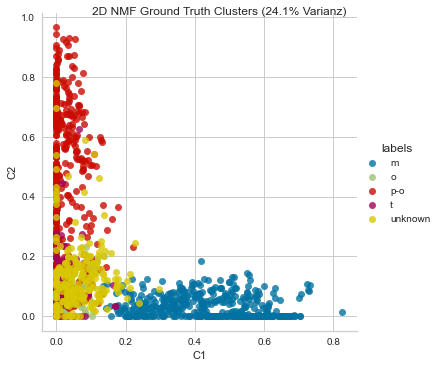

In [36]:
W_df2D  = W_df[['x1', 'x2']]
W_df2D = W_df2D.rename(columns={'x1': 'C1', 'x2': 'C2'})
W_df2D['labels'] = W_df[['labels']]
lm = sns.lmplot(data=W_df2D, x='C1', y='C2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Ground Truth Clusters (24.1% Varianz)", fontsize=12)

In [47]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['labels'],
    labels={'x1': 'C1', 'x2': 'C2', 'x3': 'C3'}, title='NMF 3D Ground Truth'
)
fig.show()

In [48]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['cluster'],
    labels={'x1': 'C1', 'x2': 'C2', 'x3': 'C3'}, title='NMF 3D K-Means Prediction'
)
fig.show()

In [57]:
from sklearn.manifold import TSNE

Xtsne = TSNE(n_components=3, perplexity=35).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)

dftsne['labels'] = labels_true
dftsne.columns = ['x1','x2', 'x3', 'labels']
dftsne

,x1,x2,x3,labels
0,-0.283076,17.955210,16.686890,m
1,12.402948,-4.231781,-17.906046,o
2,-24.038872,-3.758034,-3.622402,p-o
3,3.794918,-17.739153,2.432621,t
4,-2.960630,18.579172,16.329525,m
...,...,...,...,...
1720,9.008839,-15.455235,0.561689,t
1721,11.598369,0.785937,4.900546,m
1722,4.128865,10.866460,-9.495361,o
1723,-1.288668,-1.305653,-4.777163,unknown


In [58]:
kmeans = KMeans(n_clusters=5)
tsne_labels = kmeans.fit_predict(dftsne[['x1', 'x2', 'x3']])
dftsne['cluster'] = tsne_labels
dftsne.columns = ['x1','x2','x3','labels', 'cluster']
dftsne

,x1,x2,x3,labels,cluster
0,-0.283076,17.955210,16.686890,m,3
1,12.402948,-4.231781,-17.906046,o,0
2,-24.038872,-3.758034,-3.622402,p-o,2
3,3.794918,-17.739153,2.432621,t,4
4,-2.960630,18.579172,16.329525,m,3
...,...,...,...,...,...
1720,9.008839,-15.455235,0.561689,t,4
1721,11.598369,0.785937,4.900546,m,3
1722,4.128865,10.866460,-9.495361,o,0
1723,-1.288668,-1.305653,-4.777163,unknown,1


In [59]:
from sklearn import metrics
metrics.silhouette_score(dftsne[['x1', 'x2', 'x3']], tsne_labels, metric='l2')

0.3880917

Text(0.5, 0.98, '2D TSNE K-Means Prediction Clusters')

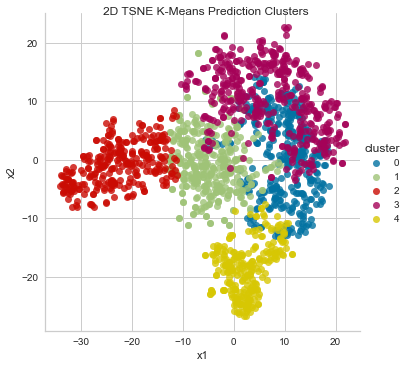

In [60]:
lm = sns.lmplot(data=dftsne, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D TSNE K-Means Prediction Clusters", fontsize=12)

Text(0.5, 0.98, '2D TSNE Ground Truth')

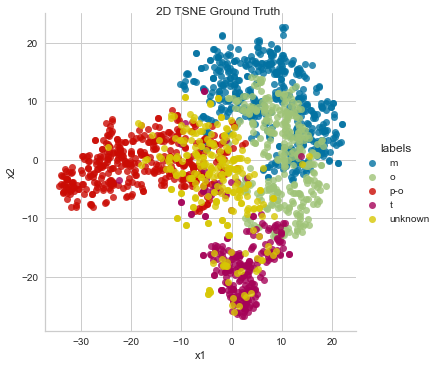

In [61]:
lm = sns.lmplot(data=dftsne, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D TSNE Ground Truth", fontsize=12)

In [62]:
import plotly.express as px

fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['cluster'], title='TSNE 3D Kmeans Prediction'
)
fig.show()

In [63]:
import plotly.express as px

fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['labels'], title='TSNE 3D Ground Truth'
)
fig.show()

In [ ]:
dftsne.head(40)

In [64]:
dftsne = dftsne.replace({'m': 3, 'p-o': 2, 'o': 0, 't': 4, 'unknown': 1})

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(dftsne['labels'], dftsne['cluster'])

0.8359420289855073